In [87]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns


In [88]:
# Load the dataset
data = pd.read_csv('CarPrice_Assignment.csv')

In [89]:
data = data.select_dtypes(include=[np.number])

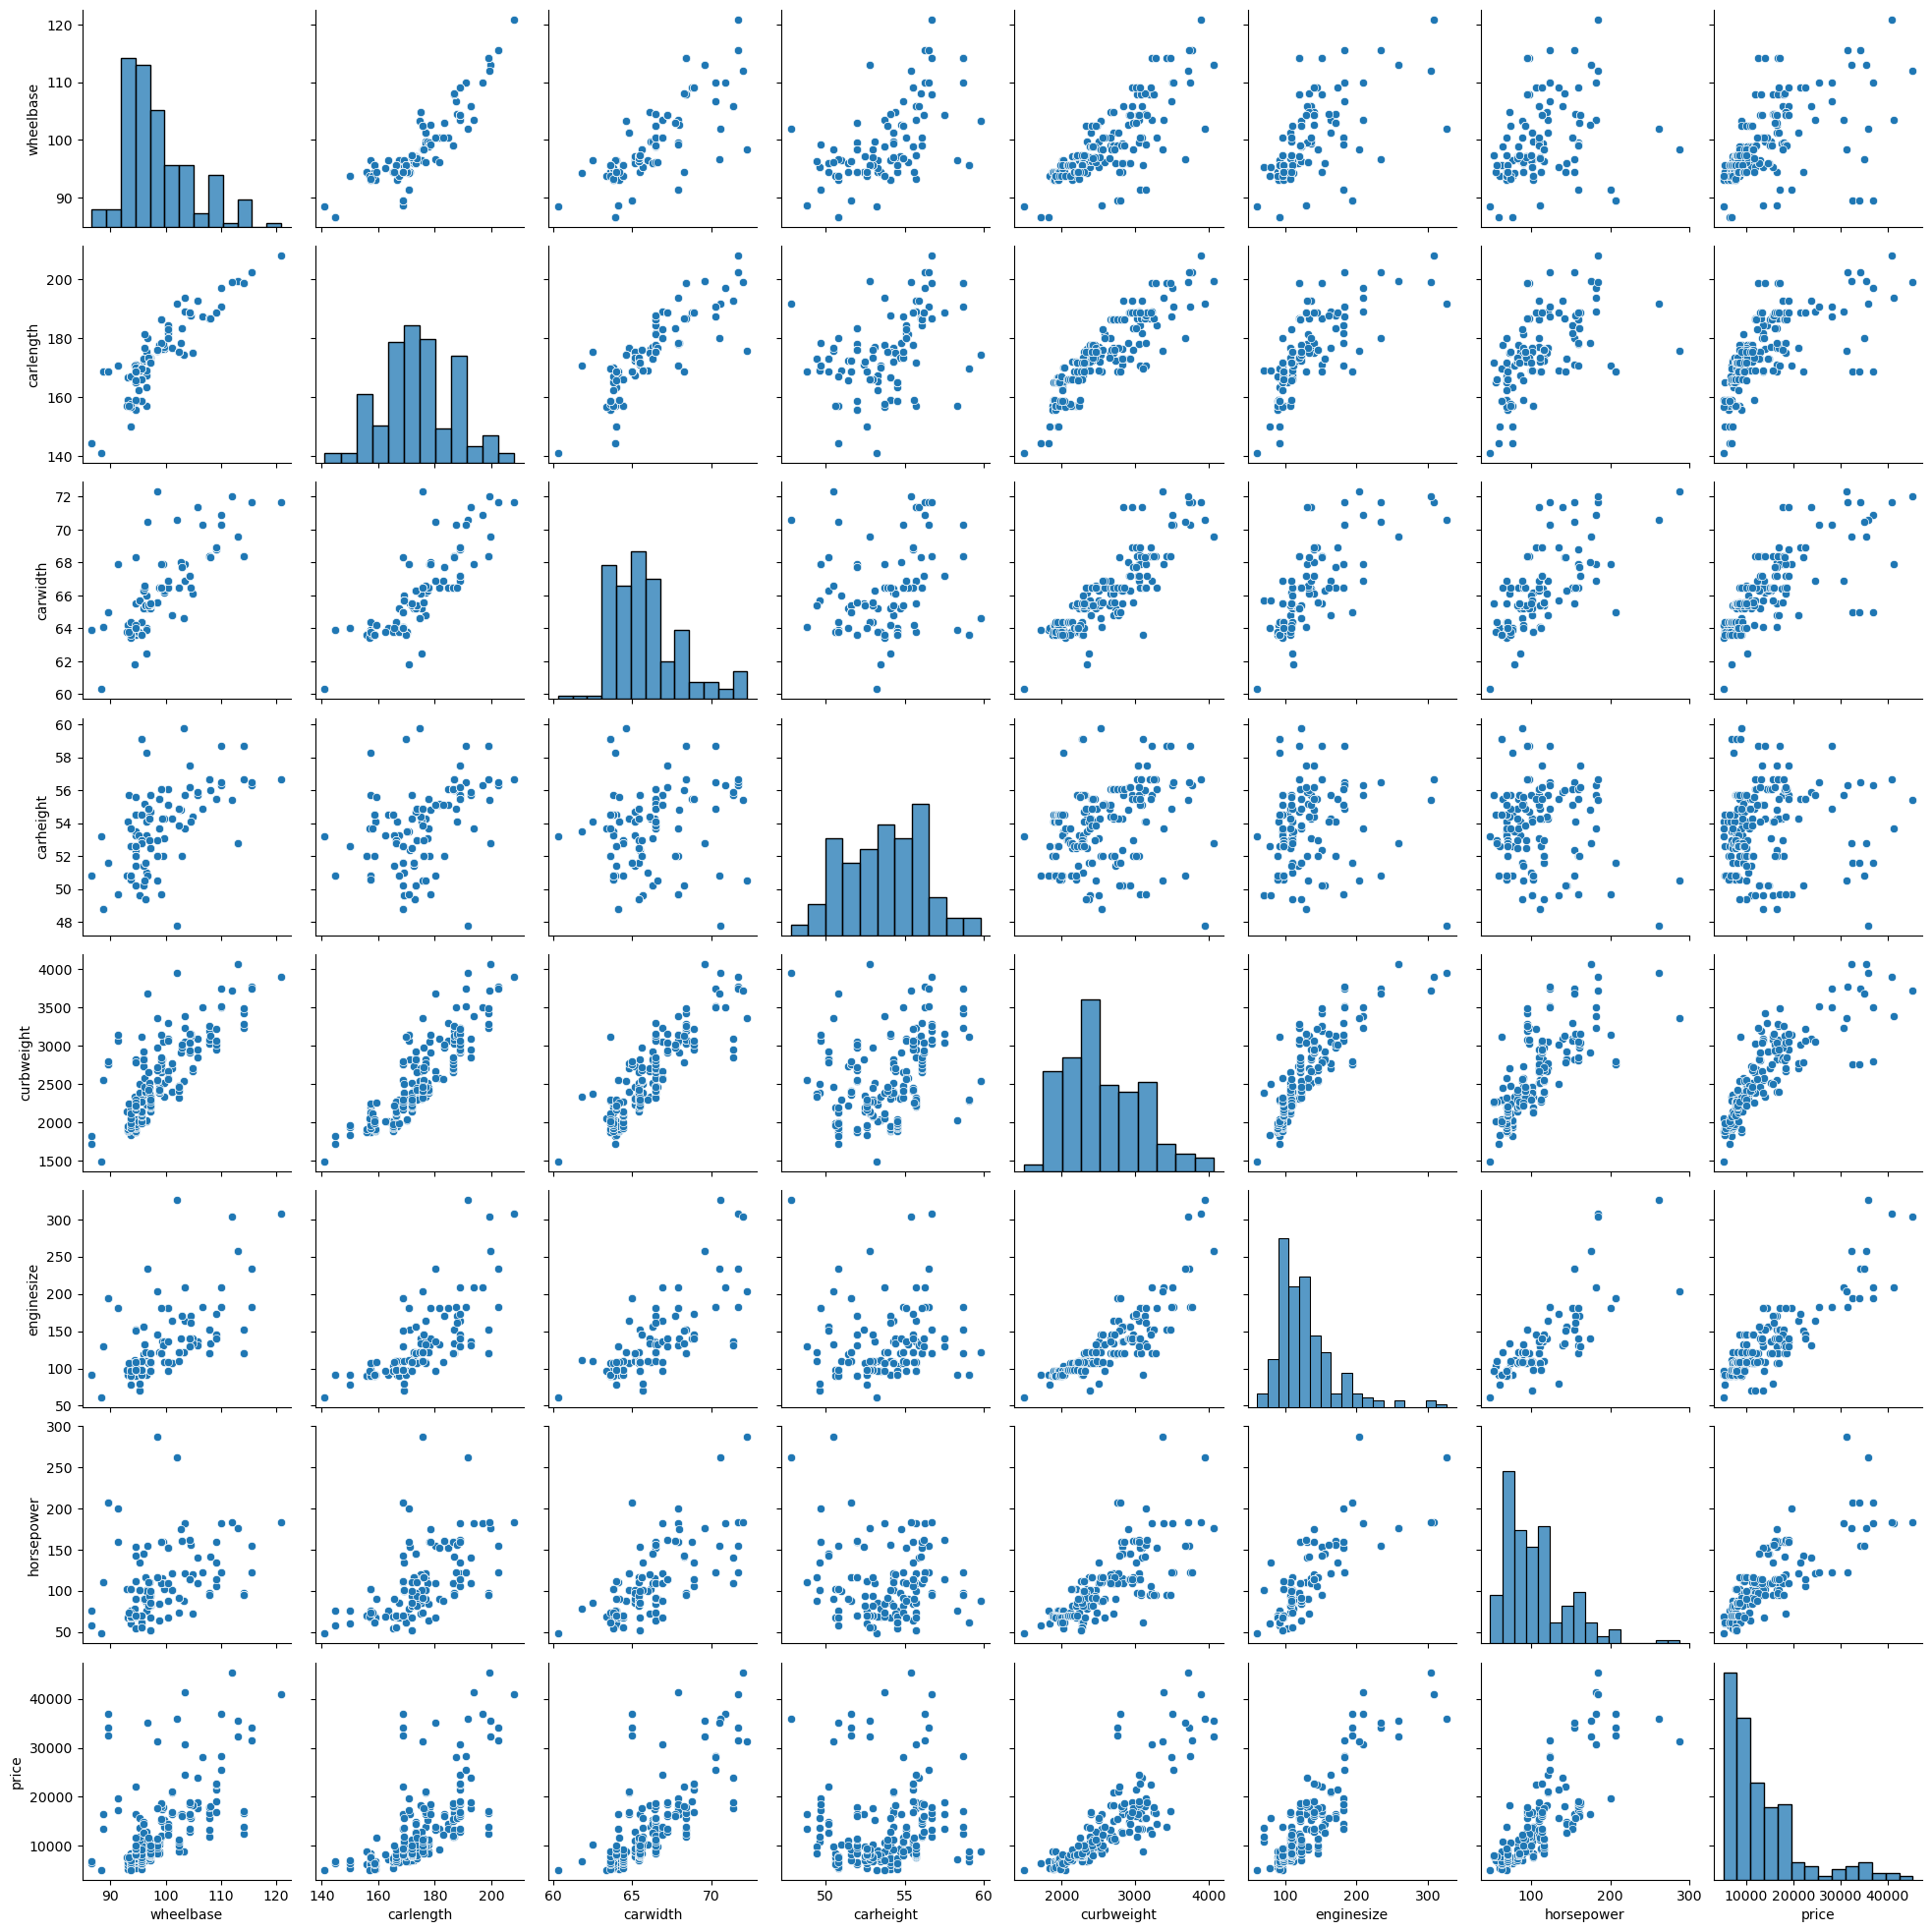

In [90]:
# Pairplot for exploring relationships between numeric variables
sns.pairplot(data, vars=['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize', 'horsepower', 'price'])
plt.show()

In [91]:
# Define the target variable and features
target = 'price'
features = [col for col in data.columns if col != target]

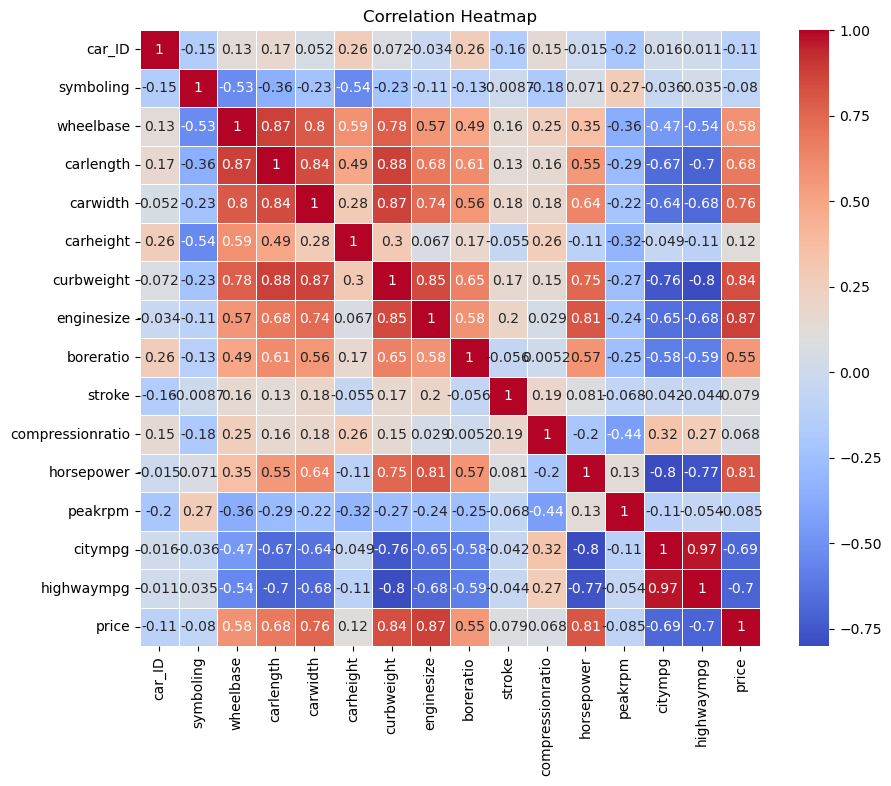

In [92]:
# Correlation heatmap to visualize feature correlations
correlation_matrix = data.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

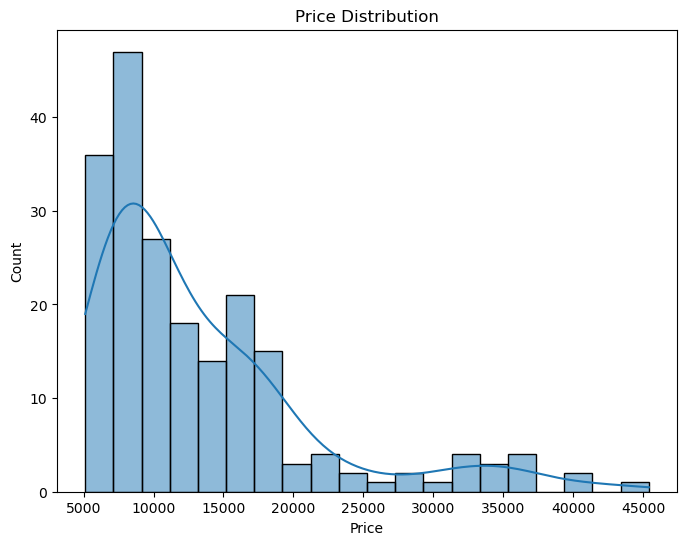

In [93]:
# Distribution of the target variable (Price)
plt.figure(figsize=(8, 6))
sns.histplot(data['price'], bins=20, kde=True)
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

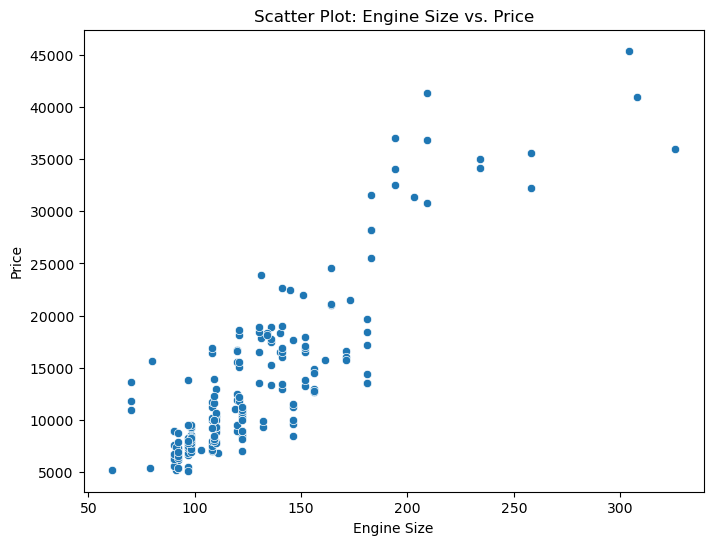

In [94]:
# Scatter plot to visualize relationships between two variables
plt.figure(figsize=(8, 6))
sns.scatterplot(x='enginesize', y='price', data=data)
plt.title('Scatter Plot: Engine Size vs. Price')
plt.xlabel('Engine Size')
plt.ylabel('Price')
plt.show()

In [95]:
# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(data[features], data[target], test_size=0.2, random_state=42)

In [96]:
# Train an XGBoost model
decision_tree_model = DecisionTreeRegressor(random_state=42)
decision_tree_model.fit(X_train, y_train)

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)

xgboost_model = xgb.XGBRegressor()
xgboost_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [97]:
# Make predictions on the test set
y_pred_decision_tree = decision_tree_model.predict(X_test)
y_pred_random_forest = random_forest_model.predict(X_test)
y_pred_xgboost = xgboost_model.predict(X_test)

In [98]:
# Create a meta-learner (Linear Regression, for example) to combine predictions
meta_X = pd.DataFrame({'DecisionTree': y_pred_decision_tree, 'RandomForest': y_pred_random_forest, 'XGBoost': y_pred_xgboost})
meta_model = LinearRegression()
meta_model.fit(meta_X, y_test)

LinearRegression()

In [99]:
# Make predictions using the ensemble model
meta_predictions = meta_model.predict(meta_X)

In [100]:
# Evaluate the ensemble model
mse = mean_squared_error(y_test, meta_predictions)
r2 = r2_score(y_test, meta_predictions)
print(f"Mean Squared Error (Ensemble): {mse}")
print(f"R-squared (Ensemble): {r2}")

Mean Squared Error (Ensemble): 3206948.691077846
R-squared (Ensemble): 0.9593769274057307


In [101]:
# Get user input for prediction
#Only run if you want to take user input
'''user_input = {}
for feature in features:
    user_input[feature] = float(input(f"Enter the value for {feature}: "))

# Create a DataFrame from user input
user_df = pd.DataFrame([user_input])

# Make predictions using the ensemble model
user_base_model_predictions = {
    'DecisionTree': decision_tree_model.predict(user_df),
    'RandomForest': random_forest_model.predict(user_df),
    'XGBoost': xgboost_model.predict(user_df)
}
user_meta_X = pd.DataFrame(user_base_model_predictions)
user_price_prediction = meta_model.predict(user_meta_X)

print(f"Predicted Price: {user_price_prediction[0]}")'''

'user_input = {}\nfor feature in features:\n    user_input[feature] = float(input(f"Enter the value for {feature}: "))\n\n# Create a DataFrame from user input\nuser_df = pd.DataFrame([user_input])\n\n# Make predictions using the ensemble model\nuser_base_model_predictions = {\n    \'DecisionTree\': decision_tree_model.predict(user_df),\n    \'RandomForest\': random_forest_model.predict(user_df),\n    \'XGBoost\': xgboost_model.predict(user_df)\n}\nuser_meta_X = pd.DataFrame(user_base_model_predictions)\nuser_price_prediction = meta_model.predict(user_meta_X)\n\nprint(f"Predicted Price: {user_price_prediction[0]}")'